<a href="https://colab.research.google.com/github/FransHutagalung/Lang-Graph/blob/main/Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.4 MB/s eta 0:00:00


In [2]:
pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [44]:
from typing import Dict , TypedDict , List , Annotated
from langgraph.graph import StateGraph , START , END
from langgraph.channels.base import BaseChannel

In [ ]:
# build AI Agent State
class AgentState(TypedDict) : # our state schema
  message : str
  name : str
  values : List[int]

def greeting_node(state : AgentState) -> AgentState :
  """Simple Node that adds a greeting message to the state """
  state["message"] = "hey " + state["message"] + " how is your day going ?"
  return state

def learning_graduate(state : AgentState) -> AgentState :
  state["message"] = f"{state['name']} , you are doing an amazing job learning LangGraph!"
  return state

def process_values(state : AgentState) -> AgentState :
  print(state)
  state["message"] = f"Hello {state['name']} your values is {sum(state['values'])}"
  print(state)
  return state


In [ ]:
class AgentState(TypedDict) :
  values : List[int]
  operation : str
  result : int

def result_values(state : AgentState) -> AgentState :
  if state["operation"] == "sum" :
    state["result"] = sum(state["values"])
  elif state["operation"] == "average" :
    state["result"] = sum(state["values"]) / len(state["values"])
  elif state["operation"] == "multiple" :
    state["result"] = 1
    for value in state["values"] :
      state["result"] *= value

  return state

In [ ]:
graph = StateGraph(AgentState)

In [ ]:
graph.add_node("learning_graduate" , learning_graduate)
graph.add_node("greeter" , greeting_node)
graph.add_node("process_values" , process_values)

In [ ]:
graph.add_node("math" , result_values)

In [ ]:
graph.set_entry_point("learning_graduate")

In [ ]:
graph.set_entry_point("math")
graph.set_finish_point("math")

In [ ]:
graph.add_edge("learning_graduate", "greeter")
graph.add_edge("greeter", "process_values")

In [ ]:
graph.set_finish_point("process_values")

In [ ]:
app = graph.compile()

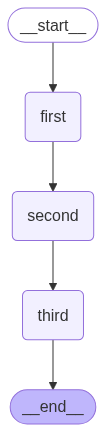

In [ ]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"values" : [1,2,3,4], "operation" : "multiple"})

In [ ]:
print(result)

{'values': [1, 2, 3, 4], 'operation': 'multiple', 'result': 24}


In [ ]:
class AgentState(TypedDict) :
  name : str
  age : int
  skills : List[str]
  result : str


In [ ]:
def first_node(state : AgentState) -> AgentState :
  state["result"] = f"{state['name']} , welcome to the system !"
  return state

def second_node(state : AgentState) -> AgentState :
  print(state)
  state["result"] = f"{state['result']} You are {state['age']} years old ! "
  print(state)
  return state

def third_node(state : AgentState) -> AgentState :
  skills_string = ", ".join(state['skills'])
  state["result"] = f"{state['result']} You have skills in {skills_string}"
  return state

In [ ]:
graph = StateGraph(AgentState)

In [ ]:
graph.add_node("first" , first_node)
graph.add_node("second" , second_node)
graph.add_node("third" , third_node)

In [ ]:
graph.add_edge("first" , "second")
graph.add_edge("second" , "third")

In [ ]:
graph.set_entry_point("first")
graph.set_finish_point("third")

In [ ]:
app = graph.compile()

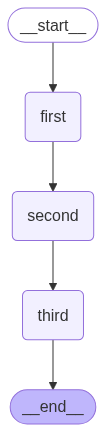

In [ ]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({'name' : 'Fransiskus' , 'age' : 21 , 'skills' : ['python' , 'java' , 'golang']})

{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system !'}
{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system ! You are 21 years old ! '}


In [ ]:
print(result)

{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system ! You are 21 years old !  You have skills in python, java, golang'}


In [ ]:
class AgentState(TypedDict) :
  number1 : int
  number2 : int
  final_number : float
  operation : str

def adder(state : AgentState) -> AgentState :
  state["final_number"] = state["number1"] + state["number2"]
  return state

def subtractor(state : AgentState) -> AgentState :
  state["final_number"] = state["number1"] - state["number2"]
  return state

def decide_next_node(state : AgentState) -> AgentState :
  if state["operation"] == "+" :
    return "addition_operation"
  elif state["operation"] == "-" :
    return "substraction_operation"
  else :
    return

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node" , adder)
graph.add_node("substract_node" , subtractor)
graph.add_node("router" , lambda state:state )

graph.add_edge(START , "router")

graph.add_conditional_edges(
    "router"  ,
    decide_next_node ,
    {
        "addition_operation" : "add_node",
        "substraction_operation" : "substract_node"
    }
)

graph.add_edge("add_node" , END)
graph.add_edge("substract_node" , END)

In [ ]:
app = graph.compile()

NameError: name 'graph' is not defined

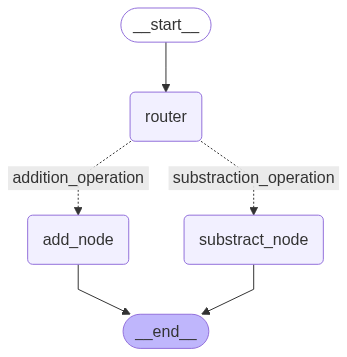

In [ ]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state1 = AgentState(number1 = 10 , number2 = 5 , operation = "+")
initial_state2 = AgentState(number1 = 10 , number2 = 5 , operation = "-")

print(app.invoke(initial_state1))


{'number1': 10, 'number2': 5, 'final_number': 15, 'operation': '+'}


In [7]:
class AgentState(TypedDict) :
  number1 : int
  number2 : int
  operation1 : str
  number3 : int
  number4 : int
  operation2 : str
  final_number1 : float
  final_number2 : float

def add_node(state : AgentState) -> AgentState :
    state["final_number1"] = state["number1"] + state["number2"]
    return state

def substract_node(state : AgentState) -> AgentState :
    state["final_number1"] = state["number1"] - state["number2"]
    return state

def add_node_2(state : AgentState) -> AgentState :
    state["final_number2"] = state["number3"] + state["number4"]
    return state

def substract_node_2(state : AgentState) -> AgentState :
    state["final_number2"] = state["number3"] - state["number4"]
    return state

def decide_next_node_1(state : AgentState) -> AgentState :
    if(state["operation1"] == "+") :
      return "addition_operation"
    elif(state["operation1"] == "-" ) :
      return "substraction_operation"
    else  :
      return

def decide_next_node_2(state : AgentState) -> AgentState :
    if(state["operation2"] == "+") :
      return "addition_operation"
    elif(state["operation2"] == "-") :
      return "substraction_operation"
    else  :
      return

In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node1" , add_node)
graph.add_node("substract_node1" , substract_node)
graph.add_node("add_node2" , add_node_2)
graph.add_node("substract_node2" , substract_node_2)

graph.add_node("router" , lambda state:state )

graph.add_edge(START , "router")

graph.add_conditional_edges(
    "router"  ,
    decide_next_node_1 ,
    {
        "addition_operation" : "add_node1",
        "substraction_operation" : "substract_node1"
    }
)


graph.add_edge("add_node1", "router2")
graph.add_edge("substract_node1", "router2")
graph.add_node("router2" , lambda state:state )

graph.add_conditional_edges(
    "router2"  ,
    decide_next_node_2 ,
    {
        "addition_operation" : "add_node2",
        "substraction_operation" : "substract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)


In [10]:
app = graph.compile()

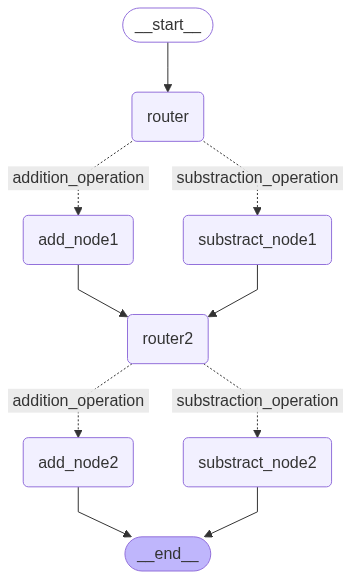

In [11]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state1 = AgentState(number1 = 12 , number2 = 4 , number3= 30 , number4 = 5 , operation1="+" , operation2="-")
print(app.invoke(initial_state1))

{'number1': 12, 'number2': 4, 'operation1': '+', 'number3': 30, 'number4': 5, 'operation2': '-', 'final_number1': 16, 'final_number2': 25}


In [ ]:
import random

In [ ]:
class AgentState(TypedDict) :
  name : str
  counter : int
  number : List[int]

def greeting_node(state : AgentState) -> AgentState :
  state["name"] = f"hi there , {state['name']}"
  return state

def random_node(state : AgentState) -> AgentState :
  state['number'].append(random.randint(0,10))
  state['counter'] += 1
  return state

def should_continue(state : AgentState) -> AgentState :
  if(state['counter'] < 5) :
    print('entering loop' , state['counter'])
    return 'loop'
  else :
    return 'exit'


In [ ]:
graph = StateGraph(AgentState)

graph.add_node('greeting' , greeting_node)
graph.add_node('random' , random_node)
graph.add_edge('greeting' , 'random')

graph.add_conditional_edges(
    'random' ,
    should_continue ,
    {
        'loop' : 'random' ,
        'exit' : END
    }
)

graph.set_entry_point('greeting')


In [ ]:
app = graph.compile()

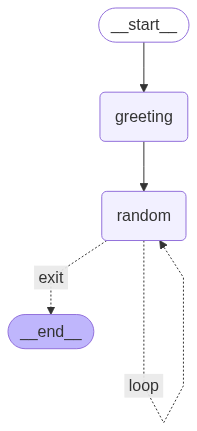

In [ ]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name" : "Fransiskus" , "counter" : -1 , "number" : []})
print(result)

entering loop 0
entering loop 1
entering loop 2
entering loop 3
entering loop 4
{'name': 'hi there , Fransiskus', 'counter': 5, 'number': [8, 2, 5, 10, 8, 1]}


In [4]:
import random

In [64]:
class AgentState(TypedDict) :
  true_number: Annotated[int, "readonly"]
  guess_number : int
  floor_guess : int
  ceil_guess : int
  name : str
  counter : int

def set_guess_number(state : AgentState) -> AgentState :
  state['guess_number'] = random.randint(state['floor_guess'] , state['ceil_guess'])
  return state

def greeting_node(state : AgentState) -> AgentState :
  state['name'] = f"hello {state['name']} lets play the game"
  return state

def add_floor_guess_counter(state : AgentState) -> AgentState :
  print('Angka Terlalu kecil ')
  state['floor_guess'] = state["guess_number"] + 1
  print(f"floor number now {state['floor_guess']}")
  state['counter'] +=1
  return state

def add_ceil_guess_counter(state : AgentState) -> AgentState :
  print('Angka Terlalu Besar ')
  state['ceil_guess'] = state["guess_number"] - 1
  print(f"ceil number now {state['ceil_guess']}")
  state['counter'] +=1
  return state

def random_guess(state : AgentState) -> AgentState :
  state['guess_number'] = random.randint(state['floor_guess'] , state['ceil_guess'])
  print(f"angka tebakan {state['guess_number']}")
  return state

def route_logic(state: AgentState) -> str:
    if state['guess_number'] == state['true_number']:
        print(f"Tebakan Benar total tebakan {state['counter']}")
        return 'exit'
    elif state['guess_number'] > state['true_number']:
        # print("Angka Terlalu Besar")
        return 'add_ceil_guess'
    elif state['guess_number'] < state['true_number']:
        # print("Angka Terlalu kecil")
        return 'add_floor_guess'


In [65]:
graph = StateGraph(AgentState)

graph.add_node('greeting', greeting_node)
graph.add_node('guess', random_guess)
graph.add_node('add_floor_guess', add_floor_guess_counter)
graph.add_node('add_ceil_guess', add_ceil_guess_counter)

graph.add_edge('greeting', 'guess')

graph.add_conditional_edges(
    'guess',
    route_logic,
    {
        'exit': END,
        'add_floor_guess': 'add_floor_guess',
        'add_ceil_guess': 'add_ceil_guess'
    }
)


graph.add_edge('add_floor_guess', 'guess')
graph.add_edge('add_ceil_guess', 'guess')

graph.set_entry_point('greeting')

In [66]:
app = graph.compile()

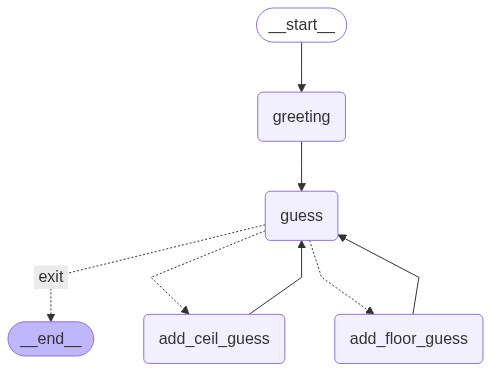

In [67]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [74]:
result = app.invoke({'name' : 'Fransiskus' , 'true_number' : 10 , 'floor_guess' : 0 , 'ceil_guess' : 20 , 'counter' : 0})
print(result)

angka tebakan 6
Angka Terlalu kecil 
floor number now 7
angka tebakan 9
Angka Terlalu kecil 
floor number now 10
angka tebakan 20
Angka Terlalu Besar 
ceil number now 19
angka tebakan 13
Angka Terlalu Besar 
ceil number now 12
angka tebakan 12
Angka Terlalu Besar 
ceil number now 11
angka tebakan 10
Tebakan Benar total tebakan 5
{'true_number': 10, 'guess_number': 10, 'floor_guess': 10, 'ceil_guess': 11, 'name': 'hello Fransiskus lets play the game', 'counter': 5}
